In [1]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
import re
from sklearn import preprocessing

In [2]:
full_df = pd.read_csv(r"shuffled-noIPV6.csv")
# df = pd.read_csv("truncated_training.csv")

print(f"[*] Shape of dataset: {full_df.shape}")
from sklearn.utils import shuffle
full_df.drop(full_df.columns[0], axis=1, inplace=True)
#full_df.drop(full_df.columns[13], axis=1, inplace=True) #drop category column
full_df = shuffle(full_df)

print(full_df.tail())
print("\n")

[*] Shape of dataset: (98271, 15)
       @timestamp           src_ip src_port          dst_ip      dst_port  \
47876  1666712777     192.168.10.2     9200           48406  192.168.10.3   
42896  1666541775    192.168.1.225    59838  74.125.200.106           443   
72293  1666580402  192.168.207.142        0               0             0   
2008   1666580394  192.168.207.142        0               0             0   
65502  1666700311     192.168.10.2     9200           47640  192.168.10.3   

                                                Protocol http_request_method  \
47876                                            TCP/UDP                   0   
42896  2022-10-24 00:15:40 ALLOW UDP 192.168.1.225 74...                 UDP   
72293                                              HTTPS                 GET   
2008                                               HTTPS                 GET   
65502                                            TCP/UDP                   0   

      http_request_ref

In [3]:
full_df["src_port"]=  full_df["src_port"].replace(regex=",", value= "")
full_df["src_port"]=  full_df["src_port"].replace(regex=",", value= "")
full_df["dst_port"]=  full_df["dst_port"].replace(regex=",", value= "")
full_df["dst_port"]=  full_df["dst_port"].replace(regex=" ", value= "")
full_df["src_port"] = full_df["src_port"].replace(regex=" ", value="")
full_df["src_port"] = full_df["src_port"].replace(regex="dns", value="53")
full_df["dst_port"] = full_df["dst_port"].replace(regex="dns", value="53")
full_df["src_port"] = full_df["src_port"].replace(regex='tls', value="43526")
full_df["dst_ip"] = full_df["dst_ip"].replace(regex="\S*:+\S+", value="0")

In [ ]:
print(f"[*] Shape of dataset: {full_df.shape}")
full_df.head(5)

In [4]:
df = full_df.head(30000)

In [5]:
data_orig = df.copy()

In [6]:
df.replace(to_replace=["None"], value=np.nan, inplace=True)
clean_df = df.fillna(str(0)) #uhm i dont knowhow to explain this, but please lmk another alternative to fix this cause :") try to run it without str and you will know what i mean"
clean_x = clean_df.iloc[:, :14].values
#clean_y = clean_df["category"].values
features = df.columns.values[:-1]

for label in clean_df.columns:
    for index, rows in clean_df.iterrows():
        new_ip = ""
        ip = str(rows[label])
        if re.search("\d+\.\d+\.\d+\.\d+", ip):
            octets = ip.split(".")
            for octet in octets:
                octet = octet.rjust(3,"0")
                new_ip += octet
            clean_df[label][index] = new_ip

clean_df["http_response_code"] = clean_df["http_response_code"].replace('HTTP/1.1"', value="0")
clean_df["src_ip"] = clean_df["src_ip"].replace('::1', value="0")
clean_df["dst_ip"] = clean_df["dst_ip"].replace('::1', value="0")
# clean_df["http_response_code"] = clean_df["http_response_code"].replace('HTTP/1.1"', value="0")
print("Done")

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_29648/1168274365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace=["None"], value=np.nan, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_29648/1168274365.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[label][index] = new_ip


Done


In [7]:
from sklearn.compose import make_column_transformer
clean_x = clean_df.iloc[:, :13] #honestly don't know if this is correct lmaoooo
#this is to iterate through the columns and convert the strings to float (passthrough means for those columns we didnt specify, leave it as it is)
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['Protocol', 'http_request_method', 'http_request_referrer', 'url_path', 'user_agent_original', 'sql_method', 'sql_query']),remainder='passthrough')
#print(column_trans)
test = column_trans.fit_transform(clean_x) #this is technically our cl

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans 
from sklearn.preprocessing import StandardScaler
import numpy as np
import csv
from collections import Counter, defaultdict
from sklearn.metrics import confusion_matrix,classification_report

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\U

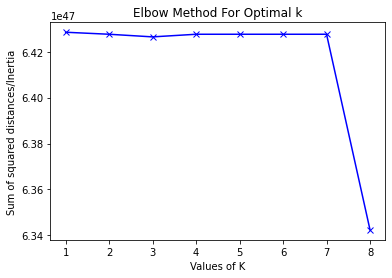

In [9]:
Sum_of_squared_distances = []
K = range(1,9)
for num_clusters in K :
  mbk = MiniBatchKMeans(init ='k-means++', n_clusters=num_clusters)
  #kmeans = KMeans(n_clusters=num_clusters)
  mbk.fit_predict(test)
  Sum_of_squared_distances.append(mbk.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = MiniBatchKMeans(init ='k-means++', n_clusters=5, batch_size=2048, random_state=42)
#kmeans.fit(test)
kmeans.fit_predict(test)
#y_km = kmeans.fit_predict(test)

In [ ]:
print(kmeans.labels_)

In [ ]:
data_orig['label_'] = kmeans.labels_

In [ ]:
data_orig.head()

In [10]:
#data_orig.to_csv('test.csv', index=False, header='True')
data_orig = pd.read_csv(r"test.csv", usecols= ['category', 'label_'])

In [11]:
data_orig['category'].value_counts()

port_scan           15255
web_enumeration      8476
sql_enumeration      3475
nmap_scan            2679
smtp_enumeration      112
ldap_enumeration        3
Name: category, dtype: int64

In [14]:
ps_count = data_orig.query('category == "port_scan"').category.count()
web_count = data_orig.query('category == "web_enumeration"').category.count()
sql_count = data_orig.query('category == "sql_enumeration"').category.count()
nmap_count = data_orig.query('category == "nmap_scan"').category.count()
smtp_count = data_orig.query('category == "smtp_enumeration"').category.count()
ldap_count = data_orig.query('category == "ldap_enumeration"').category.count()
print(ps_count)
print(web_count)
print(sql_count)
print(nmap_count)
print(smtp_count)
print(ldap_count)

15255
8476
3475
2679
112
3


In [15]:
#data_orig.to_csv('test.csv', index=False, header='True')
#acc_df = pd.read_csv(r"test.csv", usecols= ['category', 'label_'])

ct = pd.crosstab(data_orig['category'], data_orig['label_'])
print(ct)

label_               0     1     2     3     4
category                                      
ldap_enumeration     3     0     0     0     0
nmap_scan            0     2     0     0  2677
port_scan         6024   183  2971  6077     0
smtp_enumeration     0   100    12     0     0
sql_enumeration   3162     0     0   313     0
web_enumeration     15  7415   967    79     0


In [ ]:
def confusion_matrix(act_labels, pred_labels):
    uniqueLabels = list(set(act_labels))
    clusters = list(set(pred_labels))
    cm = [[0 for i in range(len(clusters))] for i in range(len(uniqueLabels))]
    for i, act_label in enumerate(uniqueLabels):
        for j, pred_label in enumerate(pred_labels):
            if act_labels[j] == act_label:
                cm[i][pred_label] = cm[i][pred_label] + 1
    return cm

In [ ]:
cnf_matrix = confusion_matrix(acc_df['category'], acc_df['label_'])
print('\n'.join([''.join(['{:4}'.format(item) for item in row])
      for row in cnf_matrix]))

In [ ]:
from sklearn import metrics
scores = {}
scores_list= []

def scoring_metrics(y_test, y_pred, model):
    print(f"y_test size:{y_test.size} y_pred size:{y_pred.size}")
    accuracy = metrics.accuracy_score(y_test, y_pred)
    scores[model] = accuracy
    scores_list.append(accuracy)
#     confusion_matrix = metrics.confusion_matrix(y_true=[True, True], y_pred=[True, True], labels=[True, False])
    #cm = confusion_matrix(y_test, y_pred, labels=['nmap_scan', 'port_scan', 'smtp_enumeration', 'sql_enumeration', 'web_enumeration'])
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix: {cm}")

    print(f"\n[*] Model: {model}")
    print("[*] Precision: {:.3f}%".format(metrics.precision_score(y_test, y_pred, average="weighted")))
    print("[*] Recall: {:.3f}%".format(metrics.recall_score(y_test, y_pred, average="weighted")))

    print("[*] Accuracy: {:.3f}%".format(accuracy))
    print("[*] F1_score: {:.3f}%".format(metrics.f1_score(y_test, y_pred, average="weighted")))

In [ ]:
scoring_metrics(acc_df['category'], acc_df['label_'], f"K-means {5}")

In [ ]:
means = kmeans.cluster_centers_
print(means)

In [ ]:
def converter(cluster):
    if cluster == 'ldap_enumeration':
        return 1
    if cluster == 'nmap_scan':
        return 2
    if cluster == 'port_scan':
        return 3
    if cluster == 'smtp_enumeration':
        return 4
    if cluster == 'sql_enumeration':
        return 5
    else:
        return 0  #web_enumeration

In [ ]:
clean_df["Cluster"] = clean_df["category"].apply(converter) #to test for accurancy

In [ ]:
print(clean_df['Cluster'])

In [ ]:
print("ConfusionMatrix",confusion_matrix(clean_df['Cluster'],kmeans.labels_))

In [ ]:
print(classification_report(clean_df['Cluster'],kmeans.labels_))

##KMeans

In [ ]:
kmeans = KMeans(init='k-means++', max_iter=300, n_clusters=5, n_init=10, random_state=42)
kmeans.fit(test)

In [ ]:
kmeans1 = KMeans(init='k-means++', max_iter=300, n_clusters=5, n_init=10, random_state=42)
kmeans1.fit_predict(test)

In [ ]:
means = kmeans1.cluster_centers_
print(means)

In [ ]:
def converter(cluster):
    if cluster == 'ldap_enumeration':
        return 1
    if cluster == 'nmap_scan':
        return 2
    if cluster == 'port_scan':
        return 3
    if cluster == 'smtp_enumeration':
        return 4
    if cluster == 'sql_enumeration':
        return 5
    else:
        return 0  #web_enumeration

In [ ]:
clean_df["Cluster"] = clean_df["category"].apply(converter) #to test for accurancy

In [ ]:
print("ConfusionMatrix",confusion_matrix(clean_df['Cluster'],kmeans1.labels_))

In [ ]:
print(classification_report(clean_df['Cluster'],kmeans1.labels_))

In [ ]:
#clean_df.head()

In [ ]:
#clean_df.category.value_counts()

In [ ]:
#clean_df.Cluster.value_counts()